# Exercice - SVM (Support Vector Machines)

## Fraude dans le secteur du vin



## Données



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/wine_fraud.csv'
df = pd.read_csv(url)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


## Exploration des données

**Quelles sont les variables uniques de la colonne cible  (quality) ?**

In [ ]:
# Code ici
df.quality.unique()

array(['Legit', 'Fraud'], dtype=object)

**diagramme de comptage (countplot) qui affiche le nombre de vins par catégorie de Légitime (legit) vs. Fraude (fraud). L'étiquette cible (Label target) est-elle équilibrée ou déséquilibrée?**

<Axes: xlabel='quality', ylabel='count'>

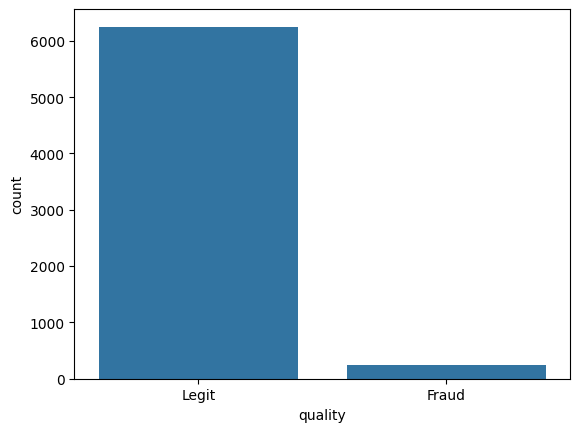

In [ ]:
# Code ici
sns.countplot(x='quality',data=df)

**Cherchons à savoir s'il existe une différence entre le vin rouge et le vin blanc en matière de fraude.**

<Axes: xlabel='type', ylabel='count'>

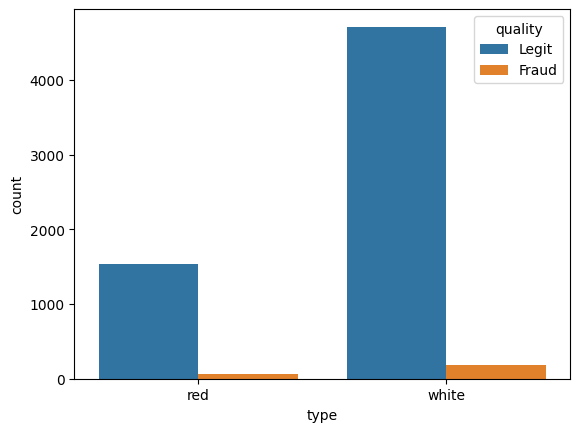

In [ ]:
# Code ici
sns.countplot(x='type',data=df,hue='quality')

**Quel pourcentage de vins rouges est frauduleux ? Quel est le pourcentage de vins blancs qui sont frauduleux ?**

In [ ]:
# Code ici
percentage_redwine_fraud = df.loc[(df['type'] == 'red') & (df['quality'] == 'Fraud')].shape[0] / df.loc[df['type'] == 'red'].shape[0]
percentage_whitewine_fraud = df.loc[(df['type'] == 'white') & (df['quality'] == 'Fraud')].shape[0] / df.loc[df['type'] == 'white'].shape[0]

In [ ]:
print("percentage redwine",percentage_redwine_fraud*100)
print("percentage whitwine",percentage_whitewine_fraud*100)

percentage redwine 3.9399624765478425
percentage whitwine 3.7362188648427925


**corrélation entre les différentes features (caractéristiques) et la colonne "quality".**

In [ ]:
# Code ici
df['quality'] = df['quality'].map({'Legit':1,'Fraud':0})

In [ ]:
temp_df = df.drop('type',axis=1)
temp_df.corr()['quality'].sort_values()

,quality
volatile acidity,-0.151228
chlorides,-0.034499
fixed acidity,-0.021794
pH,-0.020107
density,-0.016351
sulphates,0.034046
total sulfur dioxide,0.035252
residual sugar,0.048756
alcohol,0.051141
citric acid,0.061789


**diagramme à barres des valeurs de corrélation avec le vin frauduleux.**

<Axes: xlabel='None', ylabel='quality'>

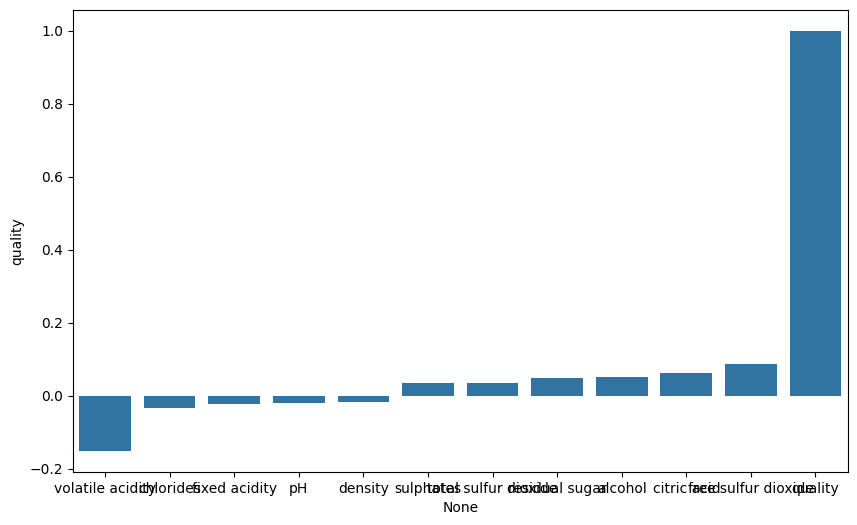

In [ ]:
from __future__ import annotations
# Code ici
plt.figure(figsize=(10,6))
sns.barplot(x=temp_df.corr()['quality'].sort_values().index,y=temp_df.corr()['quality'].sort_values())

**carte de clusters (clustermap) avec seaborn pour explorer les relations entre les variables.**

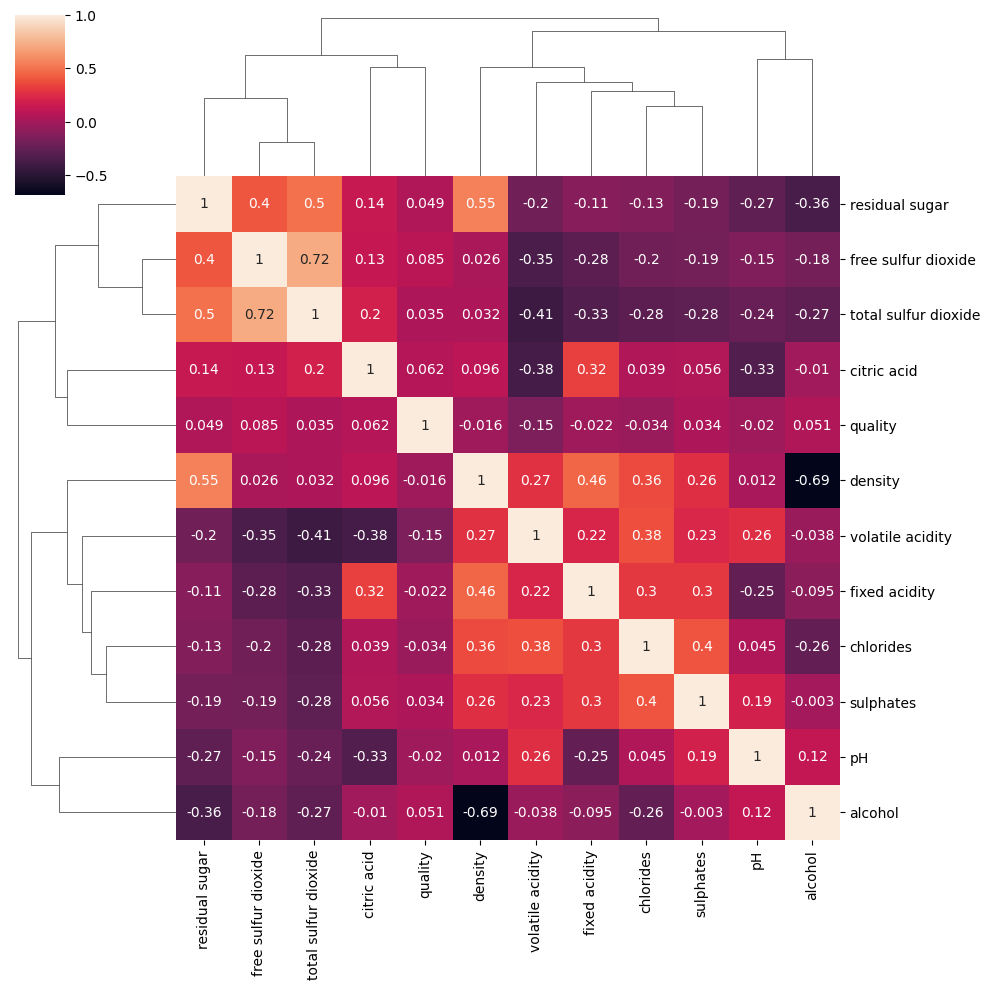

In [ ]:
# Code ici
sns.clustermap(temp_df.corr(),annot=True)

----
## Modèle de Machine Learning

**Convertir la colonne catégorielle "type" en variables dummy .**

In [ ]:
# Code ici
df['type'] = df['type'].map({'red':0,'white':1})

**Séparer les données en features X et Label cible y (colonne "quality")**.

In [ ]:
# Code ici
y = df['quality']
X = df.drop('quality',axis=1)

**Tâche : Effectuez un fractionnement Entraînement|Test (Train Test Split) sur les données, avec une taille de test de 10%. (Note : La solution utilise un random state de 101)**

In [ ]:
# Code ici
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Tâche : Mettre à l'échelle les données X train et X test**.

In [ ]:
# Code ici
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Code ici
from sklearn.svm import SVC
model = SVC(class_weight='balanced') #classes unbalanced

**Tâche : Utiliser un GridSearchCV pour effectuer une recherche sur grille afin de trouver les meilleurs paramètres C et gamma.**

In [ ]:
# Code ici
params_grid = {'C':[0.1,0.01,0.2,0.05,0.5],'gamma':['scale', 'auto']}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model,params_grid,verbose=1)

In [ ]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 0.01, 0.2, 0.05, 0.5],
                         'gamma': ['scale', 'auto']},
             verbose=1)

In [ ]:
gs.best_params_

{'C': 0.5, 'gamma': 'scale'}

**Tâche : Affichez la matrice de confusion et le rapport de classification pour votre modèle.**

In [ ]:
# Code ici

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.16      0.67      0.25        27
           1       0.98      0.84      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.75      0.58       650
weighted avg       0.95      0.84      0.88       650



In [ ]:
confusion_matrix(y_test,gs.predict(X_test))

array([[ 18,   9],
       [ 98, 525]])